## Read in Libraries and Data Prep

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
spotify = pd.read_csv('https://raw.githubusercontent.com/cjsyndergaard/project_486/main/data/spotify_data.csv')

In [3]:
spotify.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
# Notice that the same song has multiple track genres on different lines
spotify[spotify['artists'] == 'Jim Croce'][['track_id', 'artists', 'track_name', 'track_genre']]

,track_id,artists,track_name,track_genre
19700,20A2Xe76p9wxUFLbbzZjTM,Jim Croce,Time in a Bottle,country
34411,20A2Xe76p9wxUFLbbzZjTM,Jim Croce,Time in a Bottle,folk
99601,20A2Xe76p9wxUFLbbzZjTM,Jim Croce,Time in a Bottle,singer-songwriter
102601,20A2Xe76p9wxUFLbbzZjTM,Jim Croce,Time in a Bottle,songwriter


In [5]:
spotify['track_id'].nunique()

89741

In [6]:
# Only 90k unique songs
tracks = spotify['track_id'].unique()
# print(track)
# print(spotify[spotify['track_id']==track])
spotify[spotify['track_id']==tracks[0]].shape[0]

4

<Axes: >

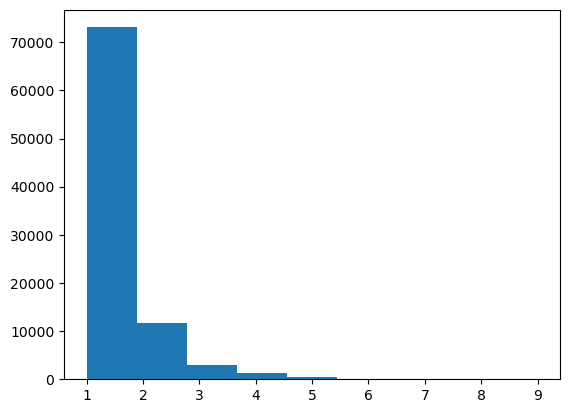

In [49]:
spotify['track_id'].value_counts().hist(grid=False,bins=9)

<Axes: >

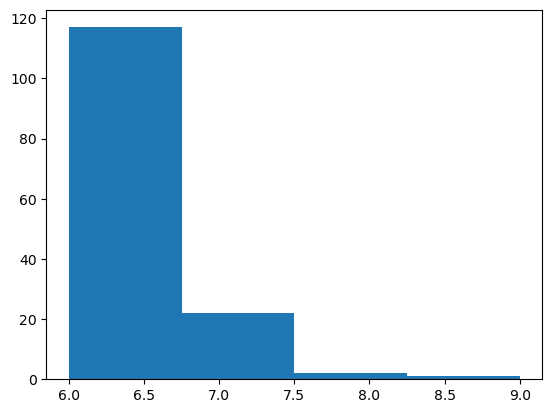

In [10]:
spotify['track_id'].value_counts()[spotify['track_id'].value_counts() >= 6].hist(grid=False,bins=4)

In [7]:
# Keep only one genre per song
spotify = spotify.drop_duplicates(subset=['track_id'], keep='first', ignore_index=True)


In [8]:
# Only some needed columns, song names and artists will over specify the model
x = spotify.iloc[:,5:20]
genre = spotify['track_genre']

<Axes: xlabel='track_genre'>

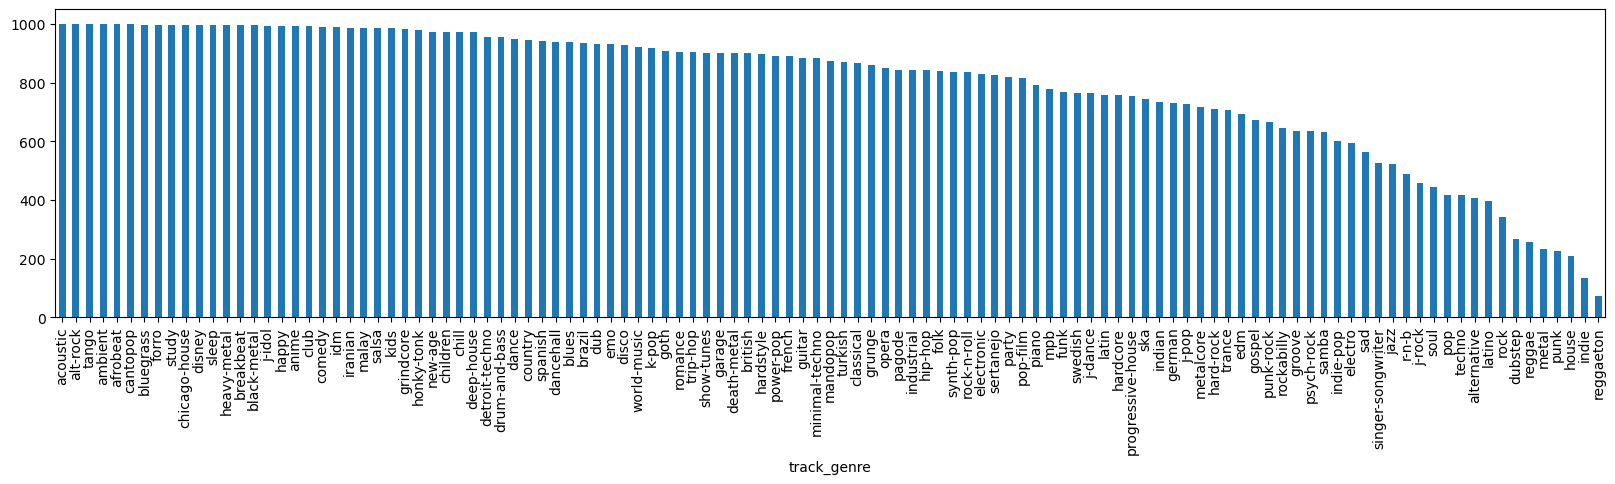

In [52]:
genre.value_counts().plot.bar(figsize=(20, 4))

In [53]:
# Nominal vars
nom_vars = ['explicit', 'key', 'mode']
ord_vars = ['time_signature']
num_vars = ['popularity', 'duration_ms', 'danceabillity', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'instrumentalness', 'liveness', 'valence', 'tempo']

In [10]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, genre, random_state=307, test_size=.2)

## Initial try

In [7]:
from sklearn.ensemble import RandomForestClassifier

genre_rf = RandomForestClassifier(n_estimators=500, random_state=7567)

genre_rf.fit(xtrain, ytrain)

In [56]:
skimp = {A:B for A, B in zip(genre_rf.feature_names_in_, genre_rf.feature_importances_)}
skimp

{'popularity': 0.11224331576369513,
 'duration_ms': 0.08877965276403088,
 'explicit': 0.006873883688776578,
 'danceability': 0.08555027779896261,
 'energy': 0.07894251574934803,
 'key': 0.04815584849977221,
 'loudness': 0.08168779302118796,
 'mode': 0.01603091772186191,
 'speechiness': 0.0839986872127689,
 'acousticness': 0.08720894862250055,
 'instrumentalness': 0.06534590329743956,
 'liveness': 0.07036660548595294,
 'valence': 0.08351521710446878,
 'tempo': 0.08188852877047814,
 'time_signature': 0.009411904498755867}

In [57]:
yhat = genre_rf.predict(xtest)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(yhat, ytest)

In [23]:
from sklearn.metrics import confusion_matrix
c =  confusion_matrix(ytest, yhat)

In [24]:
import seaborn as sns
sns.heatmap(c, annot=False)
# Clearly, the genres are the most likely values, but not exclusively. I'll make super genres.

## Super genre

In [61]:
genre.unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [11]:
# Super genres, intent
entertainment = ['anime', 'children','disney', 'kids', 'opera', 'show-tunes']
electronic = ['afrobeat', 'ambient', 'breakbeat', 'chicago-house', 'club', 'dance', 'dancehall',
              'deep-house', 'detroit-techno', 'disco', 'dub', 'dubstep', 'edm', 'electro', 'electronic',
              'funk', 'happy', 'house', 'idm',  'industrial', 'minimal-techno', 'progressive-house', 
              'techno', 'trance', 'drum-and-bass']
rock = ['alt-rock', 'black-metal', 'death-metal', 'emo', 'garage', 'goth', 'grindcore', 'groove',
        'grunge', 'hard-rock', 'hardcore', 'hardstyle', 'heavy-metal', 'j-rock', 'metal', 'metalcore',
        'psych-rock', 'punk', 'punk-rock', 'rock', 'rock-n-roll']
pop = ['cantopop', 'hip-hop', 'indie', 'indie-pop', 'j-dance', 'j-idol', 'j-pop', 'k-pop',
       'mandopop', 'party', 'pop', 'pop-film', 'power-pop', 'synth-pop', 'trip-hop', 'alternative']
folk = ['acoustic', 'blues', 'folk', 'honky-tonk', 'jazz', 'r-n-b', 'singer-songwriter', 'soul',
        'bluegrass', 'country', 'guitar', 'rockabilly']
latin = ['latin', 'latino', 'brazil', 'forro', 'mpb', 'pagode', 'reggae', 'reggaeton', 'salsa', 'samba',
         'sertanejo', 'ska', 'spanish', 'tango']
foreign = [ 'british', 'french', 'german', 'indian', 'iranian', 'malay', 'swedish', 'turkish', 'world-music']
easy_listening = ['chill', 'classical', 'gospel', 'new-age', 'piano', 'romance', 'sad', 'sleep', 'study', 'comedy']

In [12]:
super_genres = {'entertainment':entertainment,
                'electronic':electronic,
                'rock':rock,
                'pop':pop,
                'folk':folk,
                'latin':latin,
                'foreign':foreign,
                'easy_listening':easy_listening}

In [64]:
ytrain

47868            idm
21642    death-metal
47681            idm
27010            dub
67709            pop
            ...     
22333     deep-house
44891    heavy-metal
37796      grindcore
2737        alt-rock
57205          latin
Name: track_genre, Length: 71792, dtype: object

In [65]:
ytrain.unique()

array(['idm', 'death-metal', 'dub', 'pop', 'guitar', 'bluegrass', 'k-pop',
       'grindcore', 'happy', 'spanish', 'world-music', 'breakbeat',
       'french', 'grunge', 'chicago-house', 'r-n-b', 'pop-film',
       'alt-rock', 'children', 'reggae', 'afrobeat', 'german', 'opera',
       'classical', 'black-metal', 'punk-rock', 'progressive-house',
       'jazz', 'drum-and-bass', 'sertanejo', 'club', 'ska',
       'detroit-techno', 'industrial', 'trip-hop', 'sleep', 'emo',
       'new-age', 'acoustic', 'groove', 'disco', 'heavy-metal', 'british',
       'mandopop', 'turkish', 'ambient', 'garage', 'hard-rock', 'latin',
       'electronic', 'j-pop', 'goth', 'show-tunes', 'malay', 'dancehall',
       'blues', 'trance', 'forro', 'iranian', 'sad', 'disney',
       'minimal-techno', 'anime', 'kids', 'metalcore', 'brazil',
       'rockabilly', 'piano', 'cantopop', 'pagode', 'honky-tonk', 'chill',
       'j-idol', 'j-dance', 'folk', 'comedy', 'romance', 'edm', 'samba',
       'hardstyle', 'count

In [13]:
def map_to_supergenre(genre_list, super_genre):
    for i in range(0, genre_list.size):
        for sg, glist in super_genre.items():
            if genre_list.iloc[i] in glist:
                genre_list.iloc[i] = sg
    return genre_list

ytrain_sup = map_to_supergenre(ytrain, super_genres)
ytest_sup = map_to_supergenre(ytest, super_genres)

In [27]:
type(ytrain)

pandas.core.series.Series

<Axes: xlabel='track_genre'>

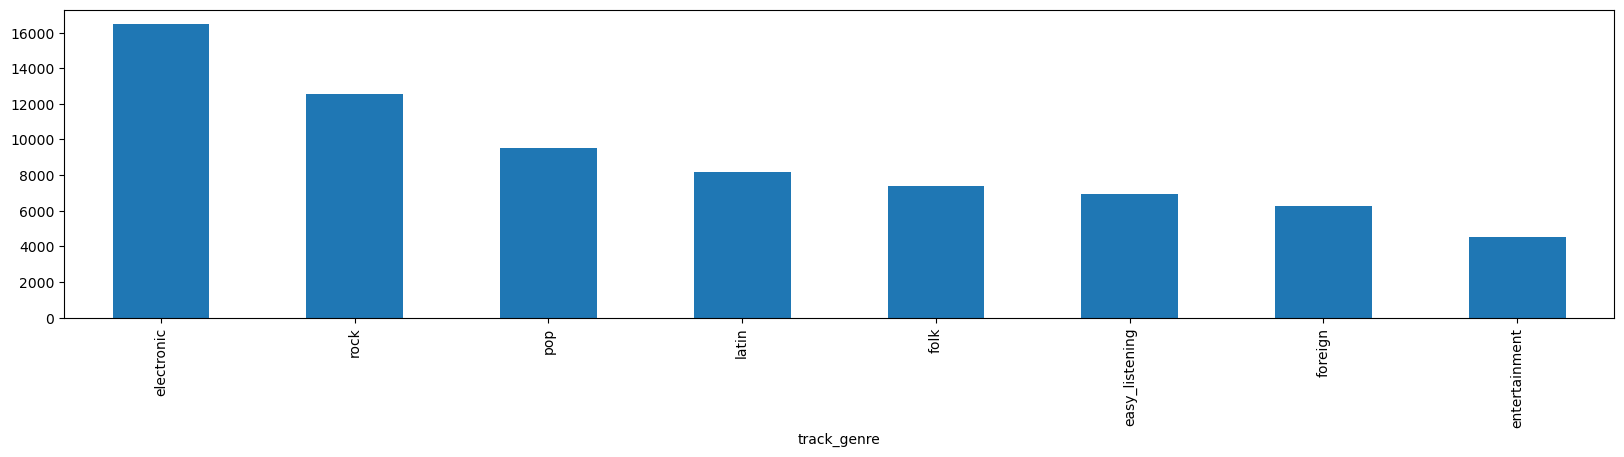

In [67]:
ytrain.value_counts().plot.bar(figsize=(20, 4))

In [29]:
x.shape

(114000, 15)

Text(0, 0.5, 'WCSS')

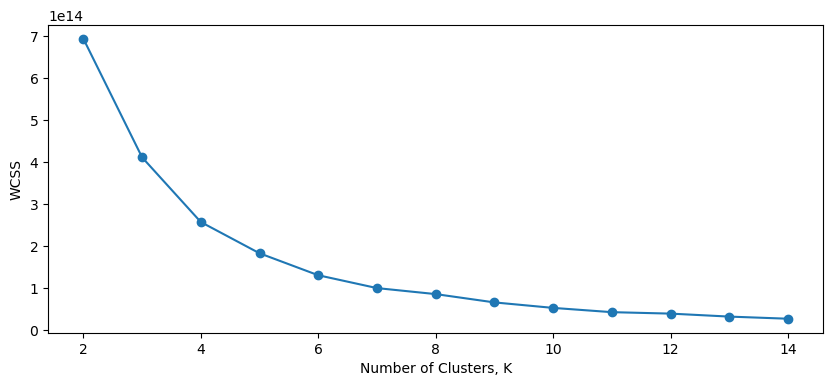

In [14]:
## By cluster
from sklearn.cluster import KMeans
kmeans_per_k = [KMeans(n_clusters=k, n_init='auto', random_state=42).fit(x)
                for k in range(2, 15)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(10,4))
plt.plot(np.arange(2,15),inertias,marker="o")
plt.xlabel('Number of Clusters, K')
plt.ylabel('WCSS')
# 8 is a reasonable number of clusters, and to make the best comparison with super-genre, we'll keep that

In [31]:
kmeans_per_k[6].labels_

array([5, 7, 5, ..., 1, 1, 5])

In [17]:
xtrain_clust, xtest_clust, ytrain_clust, ytest_clust = train_test_split(x, kmeans_per_k[6].labels_, random_state=307, test_size=.2)

In [15]:
np.unique(kmeans_per_k[6].labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([15631, 25767,  2647,    12,  9726, 35757,    17,   184],
       dtype=int64))

In [105]:
np.arange(5, 11)

array([ 5,  6,  7,  8,  9, 10])

## Second Try

In [34]:
genre_rf2 = RandomForestClassifier(n_estimators=500, random_state=7567)

genre_rf2.fit(xtrain, ytrain_sup)

RandomForestClassifier(n_estimators=500, random_state=7567)

In [35]:
ytest_sup.unique()

array(['electronic', 'pop', 'foreign', 'latin', 'rock', 'folk',
       'entertainment', 'easy_listening', 'songwriter'], dtype=object)

In [36]:
yhat2 = genre_rf2.predict(xtest)
c2 =  confusion_matrix(ytest_sup, yhat2, labels=['entertainment', 'latin', 'folk', 'electronic', 'foreign',
       'easy_listening', 'pop', 'rock'])
print(accuracy_score(ytest_sup, yhat2))



0.5971929824561404


In [ ]:
['entertainment', 'latin', 'folk', 'electronic', 'foreign',
       'easy_listening', 'pop', 'rock']

<Axes: >

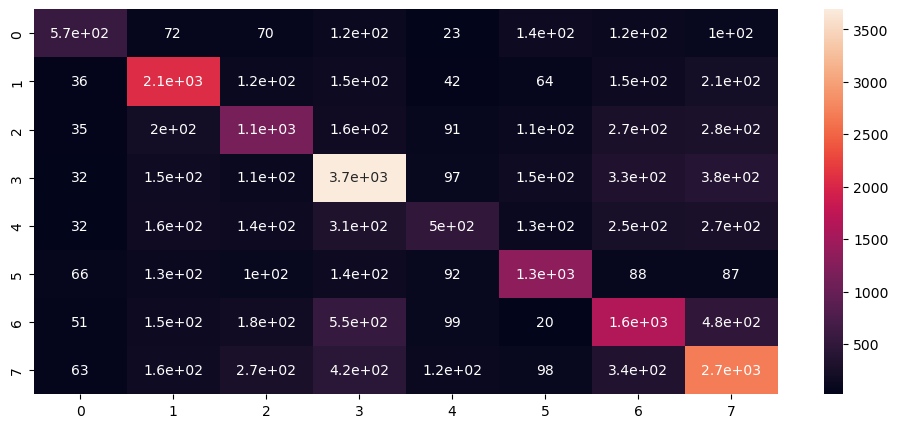

In [37]:
plt.figure(figsize=(12, 5))
sns.heatmap(c2, annot=True)

In [18]:
genre_rf3 = RandomForestClassifier(n_estimators=500, random_state=7567)

genre_rf3.fit(xtrain, ytrain_clust)

RandomForestClassifier(n_estimators=500, random_state=7567)

In [19]:
yhat3 = genre_rf3.predict(xtest)
c3 =  confusion_matrix(ytest_clust, yhat3)
print(accuracy_score(ytest_clust, yhat3))

0.9972700428993259


<Axes: >

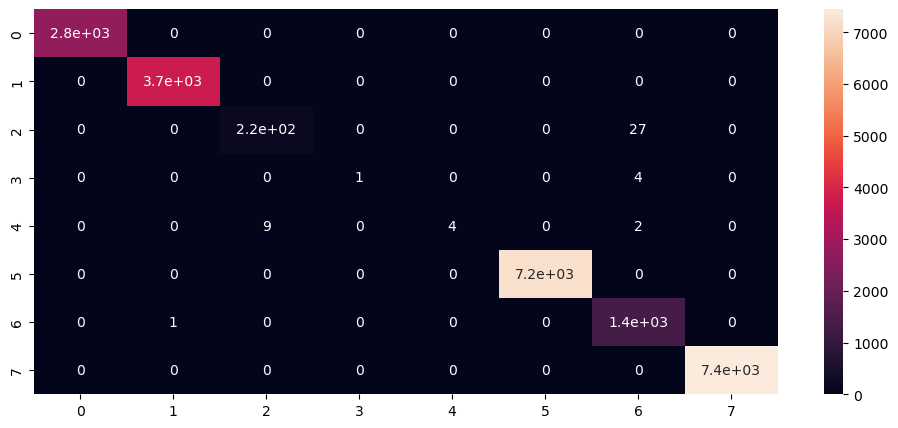

In [40]:
plt.figure(figsize=(12, 5))
sns.heatmap(c3, annot=True)

In [22]:
## NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(xtrain, ytrain)
yhat_nb = nb.predict(xtest)
cnb =  confusion_matrix(ytest_sup, yhat_nb, labels=['entertainment', 'latin', 'folk', 'electronic', 'foreign',
       'easy_listening', 'pop', 'rock'])
print(accuracy_score(ytest_sup, yhat_nb))


0.2698200456849964


In [24]:
## NAIVE BAYES
nb = GaussianNB().fit(xtrain, ytrain_clust)
yhat_nb_clust = nb.predict(xtest)
cnb_clust =  confusion_matrix(ytest_sup, yhat_nb)
print(accuracy_score(ytest_clust, yhat_nb_clust))


0.9715861607889019


<Axes: >

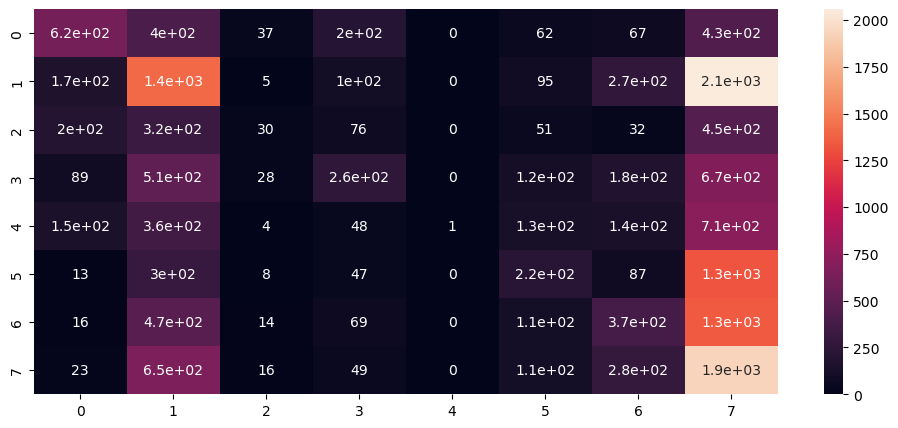

In [25]:
plt.figure(figsize=(12, 5))
sns.heatmap(cnb_clust, annot=True)

<Axes: >

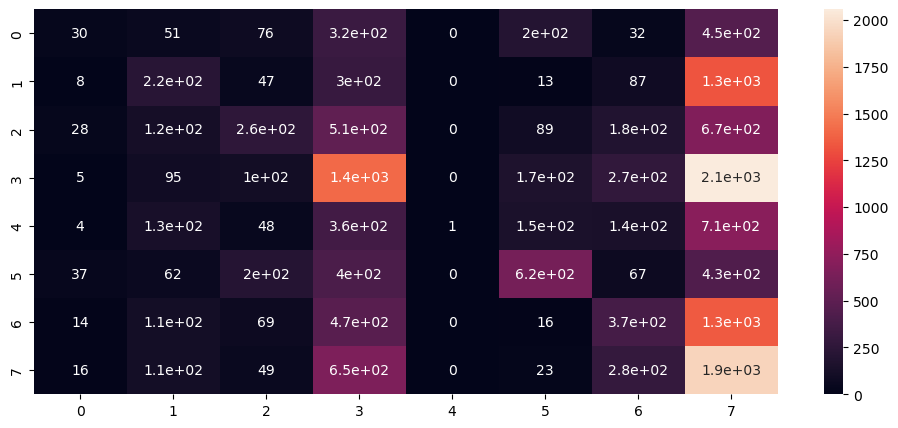

In [75]:
plt.figure(figsize=(12, 5))
sns.heatmap(c2, annot=True)

## UMAP

In [70]:
from umap import UMAP
umap = UMAP(n_neighbors=5)
um_5 = umap.fit_transform(x)

c:\Users\Colton\anaconda3\envs\stat_486\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\Colton\anaconda3\envs\stat_486\Lib\site-packages\umap\spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


Text(0, 0.5, 'Dim 2')

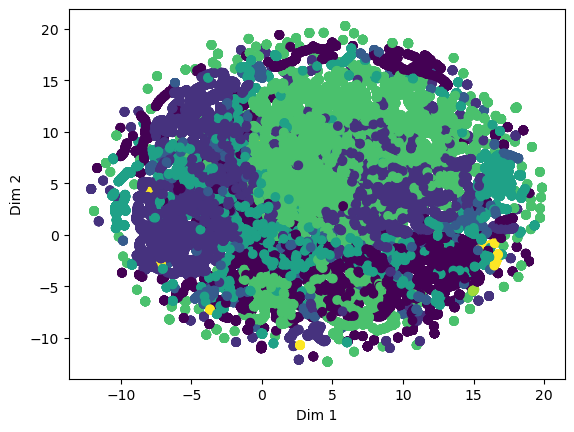

In [71]:
labels = kmeans_per_k[6].labels_.astype(int)
plt.scatter(um_5[:,0],um_5[:,1], c=labels)
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')

## Take 5

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


In [78]:
pipe = Pipeline([    
    ('rf', RandomForestClassifier())
    ])

params = {
    'rf__n_estimators' : [100, 500, 1000],
    'rf__max_features':['sqrt', None]
    }

cv = GridSearchCV(pipe, param_grid=params, cv=5, scoring='accuracy')
cv.fit(xtrain, ytrain)

print(f'Optimal hyperparameters: {cv.best_params_}')

In [20]:
genre_rf4 = RandomForestClassifier(n_estimators=1000, random_state=7567)

genre_rf4.fit(xtrain, ytrain_sup)

RandomForestClassifier(n_estimators=1000, random_state=7567)

In [26]:
yhat4 = genre_rf4.predict(xtest)
c2 =  confusion_matrix(ytest_sup, yhat4)
print(accuracy_score(ytest_sup, yhat4))

0.6281687002061396


<Axes: >

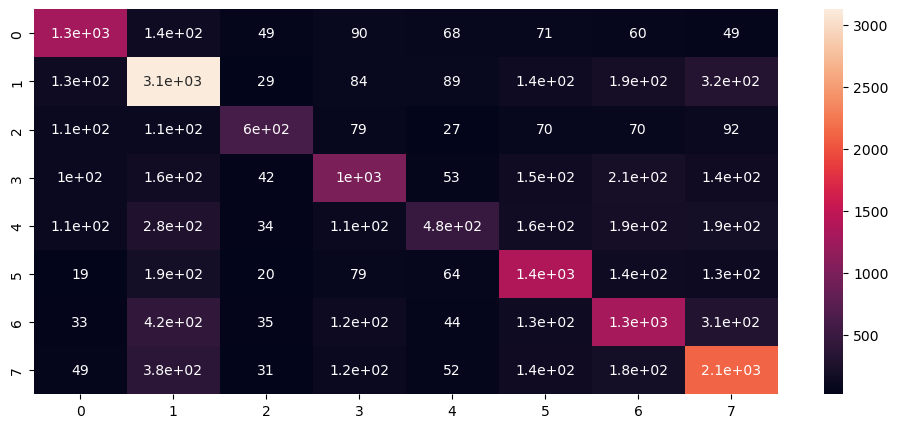

In [27]:
plt.figure(figsize=(12, 5))
sns.heatmap(c2, annot=True)

## Non-class Algorithm

In [18]:
from sklearn.neighbors import NearestCentroid

In [20]:
nc = NearestCentroid().fit(xtrain, ytrain_sup)

In [25]:
yhat_nc = nc.predict(xtest)
c_nc =  confusion_matrix(ytest_sup, yhat_nc)
print(accuracy_score(ytest_sup, yhat_nc))

0.16251601760543763


<Axes: >

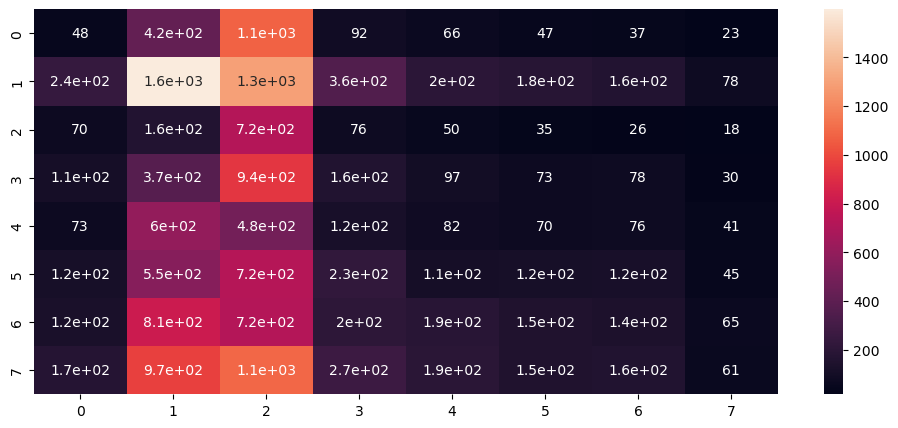

In [26]:
plt.figure(figsize=(12, 5))
sns.heatmap(c_nc, annot=True)